# Exercises

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Exercise 1 : trapezoidal integration

In this exercise, you are tasked with implementing the simple trapezoid rule
formula for numerical integration. If we want to compute the definite integral

$$
     \int_{a}^{b}f(x)dx
$$

we can partition the integration interval $[a,b]$ into smaller subintervals. We then
approximate the area under the curve for each subinterval by calculating the area of
the trapezoid created by linearly interpolating between the two function values
at each end of the subinterval:

![Illustration of the trapezoidal rule](http://raw.github.com/SciTools/courses/master/course_content/images/trapezoidal_rule.png)


<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Trapezoidal_rule_illustration.png/316px-Trapezoidal_rule_illustration.png" /img>

The blue line represents the function $f(x)$ and the red line
is the linear interpolation.  By subdividing the interval $[a,b]$, the area under $f(x)$ can thus be approximated as the sum of the areas of all
the resulting trapezoids. 


For a pre-computed $y$ array (where $y = f(x)$ at discrete samples) the trapezoidal rule equation is:

$$
   \int_{a}^{b}f(x)dx\approx\frac{1}{2}\sum_{i=1}^{n}\left(x_{i}-x_{i-1}\right)\left(y_{i}+y_{i-1}\right).
$$

In pure python, this can be written as:

    def trapz_slow(x, y):
        area = 0.
        for i in range(1, len(x)):
            area += (x[i] - x[i-1]) * (y[i] + y[i-1])
        return area / 2

#### Part 1

Create two arrays $x$ and $y$, where $x$ is a linearly spaced array in the interval $[3, 12]$ of length 10, and $y$ represents the function $f(x) = x^2- 8x + 24$ sampled at $x$.

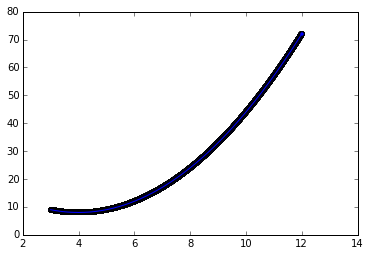

In [5]:
# declarar arreglos x,y
n_points = 10000
x = linspace(3,12,n_points)
y = x**2 - 8*x +24
plot(x,y)
scatter(x,y)

#### Part 2

Use indexing (not a for loop) to find the 9 values representing $y_{i}+y_{i-1}$ for $i$ between 1 and 9 (where $y_{0}$ is the first element of $y$).

*Hint: What indexing would be needed to get all but the last element of the 1d array $y$. Similarly what indexing would be needed to get all but the first element of a 1d array.*

In [6]:
##
print(y)
print(y[1:])
print(y[0:-1])
print(y[1:]+ y[0:-1])

[  9.           8.99820063   8.99640288 ...,  71.97120036  71.98559937  72.        ]
[  8.99820063   8.99640288   8.99460675 ...,  71.97120036  71.98559937  72.        ]
[  9.           8.99820063   8.99640288 ...,  71.95680297  71.97120036
  71.98559937]
[  17.99820063   17.99460351   17.99100963 ...,  143.92800333  143.95679973
  143.98559937]


#### Part 3

Write a function `trapz(x, y)` that applies the trapezoid formula to pre-computed values, where `x` and `y` are 1-d arrays. The function should not use a for loop.

In [7]:
## regla del trapecio sin loops
def trapz_vec(x,y):
    return sum(0.5*(y[1:]+ y[0:-1])*(x[1:]- x[0:-1]))
trapz_vec(x,y)

243.000001215243

#### Part 4

Verify that your function is correct by using the arrays created in #1 as input to ``trapz``. Your answer should be a close approximation of $\int_3^{12} x^2 -8x + 24$ which is ?.

In [8]:
def trapz_slow(x, y):
    area = 0.
    for i in range(1, len(x)):
        area += (x[i] - x[i-1]) * (y[i] + y[i-1])
    return area / 2

print(trapz_slow(x,y))
print(trapz_vec(x,y))

243.000001215
243.000001215


[-1.5, -0.01239669421491385, -0.00012174336498560479, -1.215243003116484e-06, -1.2150223938078852e-08, -1.2155965123383794e-10]


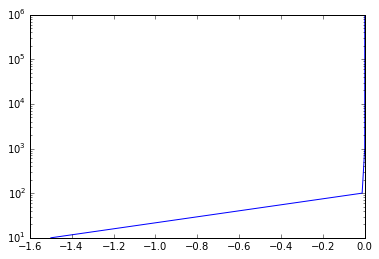

In [25]:
import matplotlib.pyplot as plt

# vector de valores de n_points
n_vec = [10,100,1000,10000,100000,1000000]
valor_exacto = 243.0
err = []

#calcular la integral con trapz_vec
# calcular el error para cada valor de n

def trapz_vec_n(x,y,n_points):
    x = linspace(3,12,n_points)
    y = x**2 - 8*x +24
    return sum(0.5*(y[1:]+ y[0:-1])*(x[1:]- x[0:-1]))

for i in range(len(n_vec)):
    x = linspace(3,12,n_vec[i])
    y = x**2 - 8*x +24
    err.append(243.0-trapz_vec(x,y))
print(err)

plt.semilogy(err,n_vec)



#### Part 5 (extension)

``scipy.integrate`` provides many common integration schemes.  Find a suitable function to perform the trapezoidal integration implemented above and check its result with your own:

In [37]:
from scipy.integrate import quad,romberg,nquad

def my_func(x):
    return(x**2 - 8*x + 24)
quad(my_func,3,12)
#romberg(my_func,3,12)

(243.0, 2.6978419498391304e-12)

## Exercise 2

Evaluate the integral

$$
\int_0^3 \int_2^4 \frac{\exp(-{x_1}^2 -\frac{{x_2}^2}{2} + x_1 x_2 +2x_1 - x_2 - 1)}{2\pi}dx_1 dx_2
$$


In [ ]:
## definir una matriz


# 2D integrals (using Monte-Carlo)

The methods we have used might be extended to 2-D integrals but they quickly become cumbersome. Instead we will follow the path of Monte-Carlo integration for highly dimensional integrals.

The principle is that to solve an integral in 2-D, we will generate a swarm of points in 3D within the intervals that we care: $x_{\rm min}, x_{\rm max}$, $y_{\rm min}$, $y_{\rm max}$, $f_{\rm min}(x,y)$ and $f_{\rm max}(x,y)$. 

Let's start with a concrete example. The integral of a 1-D gaussian:
$$
\int_{-5}^{5} \exp(-x^2)dx \sim \int_{-\infty}^{\infty}\exp{(-x^2)} = \sqrt{\pi}
$$

# Integrals by mean value

Now we introduce the more standard Monte-Carlo technique. It is based on the mean value theorem

$$
\int_a^b f(x) = (b-a)\langle f\rangle
$$

In this way we can simply approximate the average value of $f$ as the average of different values $f(x_i)$ and we can write

$$
\int_a^b f(x) = (b-a)\frac{1}{N}\sum_{i=1}^N f(x_i)
$$

where the $x_i$ are numbers randomly generated following a flat distribution in the range $a<x<b$.





## Exercise 3

Evaluate the 10-D integral

$$
\int_0^1 dx_1 \cdots\int_0^1 dx_{10} (x_1 + x_2 +\cdots+x_{10})^2
$$

and check our answer againts the analytical result $155/6$.

In [39]:
def fun(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10):
    return (x1+x2+x3+x4+x5+x6+x7+x8+x9+x10)**2
nquad(fun,[[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]])

(1.1666666666666665, 2.583293349156847e-14)